In [1]:
#DATA PREPARATION
import pandas as pd
df = pd.read_csv('Data/titanic data.csv')
df.count(0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [2]:
#CREATING TRAINING AND TESTING SETS
df = df.drop(['Ticket','Cabin','Name'], axis=1)
df = df.dropna()
from patsy import dmatrices, build_design_matrices
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp +C(Embarked)+ Parch'
# create a results dictionary to hold our regression resultsfor easy
# analysis later
df_train = df.iloc[ 0: 600, : ]
df_test = df.iloc[ 600: , : ]
#Splitting the data into dependent and independentvariables
y_train,x_train = dmatrices(formula, data=df_train,return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test,return_type='dataframe')


In [14]:
#BUILDING A MODEL
import statsmodels.api as sm
model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.451793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            5
Date:                Sat, 01 Feb 2020   Pseudo R-squ.:                  0.3307
Time:                        03:10:59   Log-Likelihood:                -271.08
converged:                       True   LL-Null:                       -404.99
Covariance Type:            nonrobust   LLR p-value:                 8.172e-56
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.1050      0.479      8.575      0.000       3.167       5.043
C(Pclass)[T.2]    -1.2971      0.306     -4.242      0.000      -1.896      -0.698
C(Pclass)[T.3]    -2.5739      0.305     -8.433      0.000      -3.172      -1.976
C(Sex)[T.male]    -2.5808      0.235    -10.996      0.000      -3.041      -2.121
Age               -0.0401      0.009     -4.549      0.000      -0.057      -0.023
SibSp             -0.3691      0.130     -2.840      0.005      -0.624      -0.114
==================================================================================
"""

In [5]:
#MODEL BY USING THE PREDICTORS SUCH AS CLASS,SEX,AGE AND NUMBER OF SIBLINGS
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp '
y_train,x_train = dmatrices(formula, data=df_train,
return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test,
return_type='dataframe')
model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.451793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            5
Date:                Sat, 01 Feb 2020   Pseudo R-squ.:                  0.3307
Time:                        02:48:18   Log-Likelihood:                -271.08
converged:                       True   LL-Null:                       -404.99
Covariance Type:            nonrobust   LLR p-value:                 8.172e-56
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.1050      0.479      8.575      0.000       3.167       5.043
C(Pclass)[T.2]    -1.2971      0.306     -4.242      0.000      -1.896      -0.698
C(Pclass)[T.3]    -2.5739      0.305     -8.433      0.000      -3.172      -1.976
C(Sex)[T.male]    -2.5808      0.235    -10.996      0.000      -3.041      -2.121
Age               -0.0401      0.009     -4.549      0.000      -0.057      -0.023
SibSp             -0.3691      0.130     -2.840      0.005      -0.624      -0.114
==================================================================================
"""

Text(0.5, 1.0, 'Distribution of our Predictions')

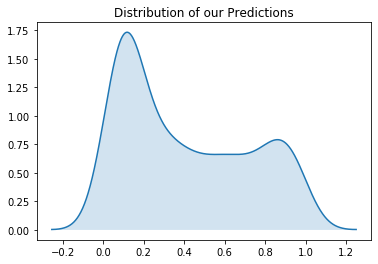

In [7]:
#MODEL EVALUATION
import matplotlib.pyplot as plt
kde_res = sm.nonparametric.KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density,alpha=0.2)
plt.title("Distribution of our Predictions")

Text(0.5, 1.0, 'The Change of Survival Probability by Genderbeing Male')

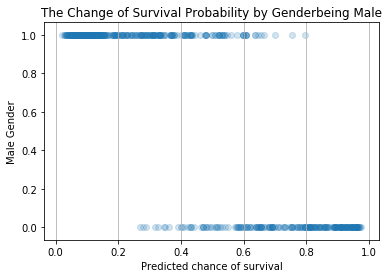

In [8]:
#PREDICTION DISTRIBUTION BASED ON THE MALE GENDER
plt.scatter(res.predict(),x_train['C(Sex)[T.male]'] ,
alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Male Gender")
plt.title("The Change of Survival Probability by Genderbeing Male")

Text(0.5, 1.0, 'The Change of Survival Probability by LowerClass which is 3rd class')

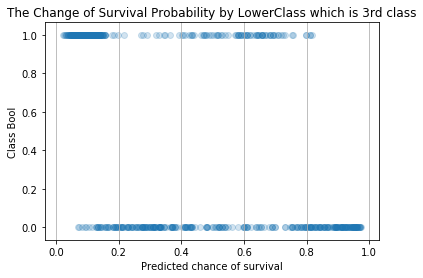

In [9]:
#PREDICTION DISTRIBUTION BASED ON LOWER CLASS PASSENGERS
plt.scatter(res.predict(),x_train['C(Pclass)[T.3]'] , alpha=0.2)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool") # Boolean class to show if its 3rdclass
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by LowerClass which is 3rd class")

Text(0, 0.5, 'Age')

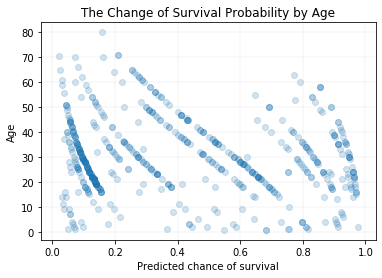

In [10]:
#PREDICTION DISTRIBUTION BASED ON AGE OF PASSENGERS
plt.scatter(res.predict(),x_train.Age , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

Text(0, 0.5, 'No. of Siblings/Spouses')

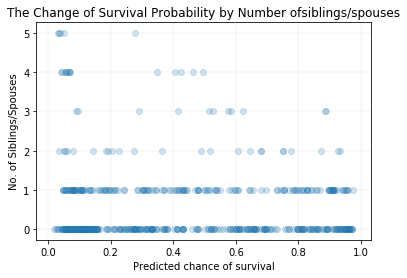

In [12]:
#DESTRIBUTION OF PROBABILITY BASED ON THE SIBLINGS
plt.scatter(res.predict(),x_train.SibSp , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Number ofsiblings/spouses")
plt.xlabel("Predicted chance of survival")
plt.ylabel("No. of Siblings/Spouses")